Epoch 1/50


/Users/dineshbisht/masterdegree/myproject_env/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 0.8173 - loss: 0.5949 - val_accuracy: 0.9397 - val_loss: 0.1985
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.9224 - loss: 0.2696 - val_accuracy: 0.9552 - val_loss: 0.1510
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.9386 - loss: 0.2140 - val_accuracy: 0.9606 - val_loss: 0.1286
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.9458 - loss: 0.1855 - val_accuracy: 0.9643 - val_loss: 0.1195
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.9523 - loss: 0.1658 - val_accuracy: 0.9678 - val_loss: 0.1119
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.9563 - loss: 0.1502 - val_accuracy: 0.9710 - val_loss: 0.1017
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.9589 - loss: 0.1395 - val_accuracy: 0.9733 - val_loss: 0.1017
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.9615 - loss: 0.1319 - val_accurac

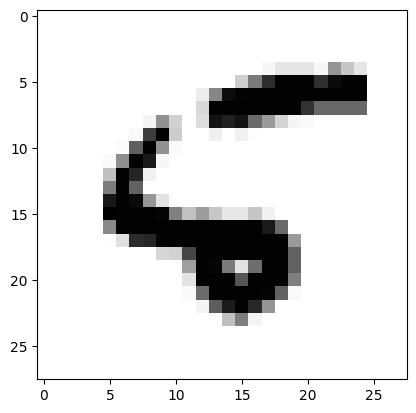

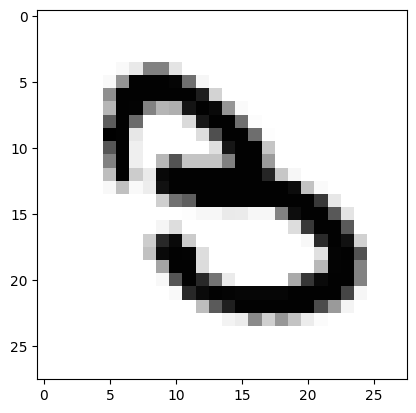

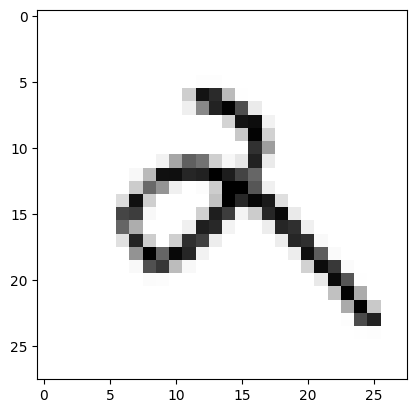

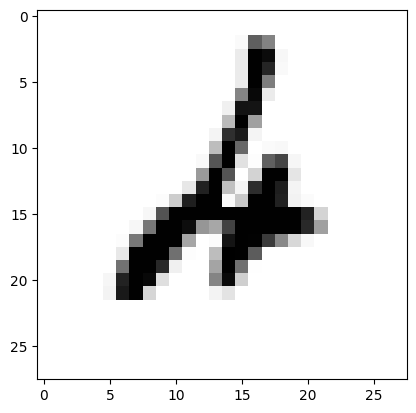

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# plt.imshow(X_test[0], cmap="Greys")
# print(X_train.shape, X_test.shape) # (60000, 28, 28) (10000, 28, 28)

X_train_shaped = X_train.reshape(60000, 28, 28, 1)/255
X_test_shaped = X_test.reshape(10000, 28, 28, 1)/255

y_train_OH = pd.get_dummies(y_train).to_numpy()
y_test_OH =  pd.get_dummies(y_test).to_numpy()

# Train the model on the train dataset
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train_shaped.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(50, activation='relu',),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(30, activation='relu',),
    tf.keras.layers.Dense(y_train_OH.shape[1], activation='softmax')
])

model.compile(
    tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_shaped, y_train_OH, validation_data=(X_test_shaped, y_test_OH), epochs=50, batch_size=100)

# Train the model on the train data
model.fit(X_train_shaped, y_train_OH)

# Generate predictions for the train and test dataset
nn_model_prediction_train = np.argmax(model.predict(X_train_shaped), axis=1)
nn_model_prediction_test = np.argmax(model.predict(X_test_shaped), axis=1)

# Evaluate and display model accuracy with Accuracy for train and test datasets
print(f"\nAccuracy Score in train dataset using Neural Network Model: {accuracy_score(y_train, nn_model_prediction_train):.3f}")
print(f"Accuracy Score in test dataset using Neural Network Model: {accuracy_score(y_test, nn_model_prediction_test):.3f}\n")

wrong_predictions = []

for i in range(0, len(y_test)):
    if nn_model_prediction_test[i] != y_test[i]:
        wrong_predictions.append(i)

for i in range(0, 4):
    plt.imshow(X_test[wrong_predictions[i]], cmap="Greys")
    plt.show()


